## AASD 4014 Project - Drowsiness Detection using TensorFlow Object Detection API

In [ ]:
!pip install tensorflow==2.9.2

In [14]:
import os
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Prepare the Workpace and Install Tensorflow API

<font size=3>Object_Detection is the main folder of this project in Google Drive. Create a new folder called customTF2 in Object_Detection. In customTF2, create 3 folders: data, pre-trained and training.</font> <br><br> <font size=3>In data folder, upload the train_labels.csv, valid_labels.csv and test_labels.csv created by the Roboflow.</font><br><br>
<font size=3>Create a folder called images and upload the train, valid and test sets.</font>

In [4]:
%cd /content/gdrive/MyDrive/Object_Detection

/content/gdrive/MyDrive/Object_Detection


In [8]:
%ls

active_fatigued.ipynb  customTF2/


<font size=3>Clone the Tensorflow API into the main folder first. Then, go to the 'models/research' and install the API by the following code.</font>

In [9]:
!git clone --q https://github.com/tensorflow/models.git

In [ ]:
%cd models/research
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

<font size=3>Test whether the API has been installed successfully by running the model_builder_tf2_test.py</font>

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

## Create label_map.pbtxt and .record files

<font size=3>Go to the Object_Detection/customTF2/data and create a label map by following code.</font>

In [13]:
%cd /content/gdrive/MyDrive/Object_Detection/customTF2/data

/content/gdrive/MyDrive/Object_Detection/customTF2/data


In [15]:
labels = [{'name':'active', 'id':1}, {'name':'fatigued', 'id':2}]

with open('/content/gdrive/MyDrive/Object_Detection/customTF2/data/label_map.pbtxt', 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

<font size=3>Download the generate_tfrecord.py from XXX and upload it to the customTF2 folder. In the customTF2/data, there should be 4 files: label_map.pbtxt, test_labels.csv, train_labels.csv, valid_labels.csv and 1 folder: images.</font>

In [17]:
script = '/content/gdrive/MyDrive/Object_Detection/customTF2/generate_tfrecord.py'

In [18]:
%ls

images/  label_map.pbtxt  test_labels.csv  train_labels.csv  valid_labels.csv


<font size=3>Execute the generate_tfrecord.py to generate the .record files of train and valid set by following code.</font>

In [19]:
!python {script} train_labels.csv  label_map.pbtxt images/train train.record

!python {script} valid_labels.csv  label_map.pbtxt images/valid valid.record

2023-04-09 00:19:54.683250: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
groups: 100% 469/469 [03:21<00:00,  2.33it/s]
Successfully created the TFRecords: /content/gdrive/MyDrive/Object_Detection/customTF2/data/train.record
2023-04-09 00:23:20.671658: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
groups: 100% 93/93 [00:39<00:00,  2.37it/s]
Successfully created the TFRecords: /content/gdrive/MyDrive/Object_Detection/customTF2/data/valid.record


<font size=3>After running the code, there should be 2 new .record files.</font>

In [21]:
%ls

images/          test_labels.csv   train.record      valid.record
label_map.pbtxt  train_labels.csv  valid_labels.csv


## Download the Pre-trained Model 

<font size=3>Go to the Object_Detection/customTF2/pre-trained. Download and unzip the pre-trained model Faster R-CNN ResNet101 V1 640x640.</font>

In [24]:
%cd /content/gdrive/MyDrive/Object_Detection/customTF2/pre-trained

/content/gdrive/MyDrive/Object_Detection/customTF2/pre-trained


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz

In [ ]:
!tar -xzvf faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz

## Configure the Training Pipeline and Train the Custom Model

<font size=3>Copy the pipeline.config of the pre-trained model downloaded above to the Object_Detection/customTF2/data. Next, follow the setting below and edit the copied .config. This .config is for training the custom model.</font>

<font size=3>Edit the model:
- num_classes: 2

Edit the train_config:
- batch_size: 4
- num_steps: 15000
- fine_tune_checkpoint_type: "detection"
- fine_tune_checkpoint: (the path to the checkpoint of pre-trained model)
- freeze_variables: ".*resnet_v1_101.*"

Edit the train_input_reader:
- label_map_path: (the path to the label_map.pbtxt)
- input_path: (the path to the train.record)

Edit the train_input_reader:</font>
- label_map_path: (the path to the label_map.pbtxt)
- input_path: (the path to the valid.record)



In [27]:
config_pretrained = '/content/gdrive/MyDrive/Object_Detection/customTF2/pre-trained/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/pipeline.config'

In [28]:
!cp {config_pretrained} /content/gdrive/MyDrive/Object_Detection/customTF2/data

In [7]:
config_custom = '/content/gdrive/MyDrive/Object_Detection/customTF2/data/pipeline.config'
checkpoint_custom = '/content/gdrive/MyDrive/Object_Detection/customTF2/training'

Go to the Object_Detection/models/research/object_detection and execute the model_main_tf2 to train the custom model according to the config_custom and save the model in checkpoint_custom.

In [31]:
%cd /content/gdrive/MyDrive/Object_Detection/models/research/object_detection

/content/gdrive/MyDrive/Object_Detection/models/research/object_detection


In [32]:
!python model_main_tf2.py --pipeline_config_path={config_custom} --model_dir={checkpoint_custom}

2023-04-09 00:38:28.784862: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
2023-04-09 00:38:32.842075: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0409 00:38:32.863546 140092349986624 mirr

## Evaluate the Custom Model

<font size=3>Execute the model_main_tf2.py again to calcuate the mAP of the model by the code below.</font>

In [33]:
!python model_main_tf2.py --pipeline_config_path={config_custom} --model_dir={checkpoint_custom} --checkpoint_dir={checkpoint_custom}

2023-04-09 03:59:57.621106: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
W0409 04:00:02.553630 140160444733248 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0409 04:00:02.553862 140160444733248 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0409 04:0

## Load the Model from Checkpoint and Testing

In [6]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util
%matplotlib inline

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [8]:
configs = config_util.get_configs_from_pipeline_file(config_custom)
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(checkpoint_custom, 'ckpt-16')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [9]:
category_index = label_map_util.create_category_index_from_labelmap('/content/gdrive/MyDrive/Object_Detection/customTF2/data/label_map.pbtxt')

In [10]:
def test_image(IMAGE_PATH):
  img = cv2.imread(IMAGE_PATH)
  image_np = np.array(img)

  input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
  detections = detect_fn(input_tensor)

  num_detections = int(detections.pop('num_detections'))
  detections = {key: value[0, :num_detections].numpy()
                for key, value in detections.items()}
  detections['num_detections'] = num_detections

  # detection_classes should be ints.
  detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

  label_id_offset = 1
  image_np_with_detections = image_np.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
              image_np_with_detections,
              detections['detection_boxes'],
              detections['detection_classes']+label_id_offset,
              detections['detection_scores'],
              category_index,
              use_normalized_coordinates=True,
              max_boxes_to_draw=5,
              min_score_thresh=.8,
              agnostic_mode=False)

  plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
  plt.show()

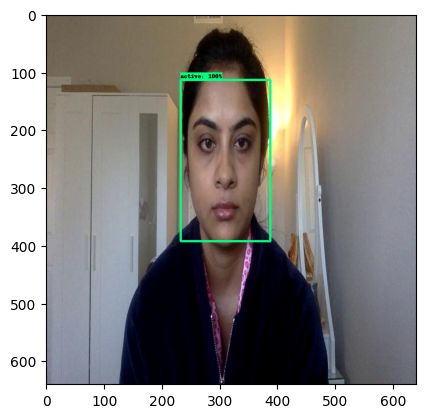

In [21]:
test_image('/content/gdrive/MyDrive/Object_Detection/customTF2/data/images/test/image_10063_active_jpg.rf.057baf7b68f0ff7e3c75bd9d9d233f4c.jpg')

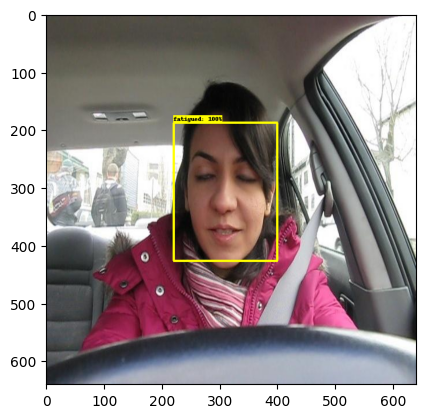

In [20]:
test_image('/content/gdrive/MyDrive/Object_Detection/customTF2/data/images/test/72_jpg.rf.113d05eabeea1a30cc21ae9d9a5ff9d1.jpg')